In [1]:
import networkx as nx
import pandas as pd

In [68]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'data_set_citations.json'

In [69]:
df = pd.read_json(dirname+filename)
df['data_set_id'] = ['data_'+str(i) for i in df['data_set_id']]
df['publication_id'] = ['pub_'+str(i) for i in df['publication_id']]
df = df.drop('mention_list', axis=1)
df.head()

,data_set_id,publication_id,score
0,data_305,pub_103,0.264053
1,data_306,pub_103,0.429020
2,data_320,pub_103,0.374938
3,data_306,pub_104,0.293487
4,data_306,pub_106,0.343932


In [70]:
df.shape

(2925, 3)

In [71]:
df_visual = df.sample(frac=0.05, replace=True, random_state=1)

In [119]:
G = nx.Graph()
G.add_weighted_edges_from(df_visual.values.tolist(),color='black')

In [73]:
df_visual.values.tolist()

[['data_1135', 'pub_6731', 0.558959662914276],
 ['data_204', 'pub_5894', 0.6643052101135251],
 ['data_665', 'pub_6793', 0.36561074852943404],
 ['data_558', 'pub_6619', 0.269524306058883],
 ['data_1165', 'pub_8069', 0.841029822826385],
 ['data_520', 'pub_7847', 0.40181159973144503],
 ['data_522', 'pub_6648', 0.41873899102211],
 ['data_831', 'pub_5736', 0.35259917378425604],
 ['data_320', 'pub_3161', 0.37665072083473206],
 ['data_306', 'pub_8193', 0.25870785117149303],
 ['data_1206', 'pub_7888', 0.41023120284080505],
 ['data_502', 'pub_6882', 0.282672673463821],
 ['data_993', 'pub_6939', 0.49784460663795405],
 ['data_550', 'pub_6931', 0.311789542436599],
 ['data_51', 'pub_6057', 0.276429235935211],
 ['data_1277', 'pub_7840', 0.37272557616233803],
 ['data_45', 'pub_5909', 0.290285646915435],
 ['data_1004', 'pub_6413', 0.484694957733154],
 ['data_663', 'pub_7802', 0.26724123954772905],
 ['data_1273', 'pub_6302', 0.35644441843032804],
 ['data_855', 'pub_7940', 0.279575288295745],
 ['data_75

In [74]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'research_fields.json'

In [75]:
df_rf = pd.read_json(dirname+filename)
# df_rf['data_set_id'] = ['data_'+str(i) for i in df_rf['data_set_id']]
df_rf['publication_id'] = ['pub_'+str(i) for i in df_rf['publication_id']]
# df_rf = df_rf.drop('mention_list', axis=1)
df_rf.head(15)

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91
5,pub_108,business:finance,0.76
6,pub_112,business:finance,0.79
7,pub_113,economics:finance,0.81
8,pub_114,sociology:finance,0.74
9,pub_117,economics:finance,0.77


In [76]:
df_rf_visual = pd.merge(df_rf,df_visual , on='publication_id', how='inner')[['publication_id','research_field','score_x']]

In [77]:
set(df_rf_visual.research_field)

{u'business:criminology',
 u'business:education',
 u'business:finance',
 u'business:healthcare',
 u'economics:finance',
 u'economics:healthcare',
 u'medicine:education',
 u'medicine:finance',
 u'medicine:healthcare',
 u'sociology:criminology',
 u'sociology:education',
 u'sociology:finance',
 u'sociology:healthcare'}

In [78]:
from networkx.algorithms.connectivity import local_node_connectivity

## examples if it's cut off. 
# local_node_connectivity(G, 'data_306', 'pub_103')

In [120]:
G.add_weighted_edges_from(df_rf_visual.values.tolist(),color='blue')

In [80]:
dataset_degrees = []
dataset_degrees_dict = {}
for dataset in df_visual.data_set_id:
    degree = G.degree(dataset)
    dataset_degrees.append(degree)
    dataset_degrees_dict[dataset] = degree

In [81]:
dataset_degrees_dict

{'data_1004': 1,
 'data_1015': 1,
 'data_1032': 1,
 'data_1037': 4,
 'data_1060': 1,
 'data_1062': 3,
 'data_1081': 1,
 'data_1131': 1,
 'data_1135': 1,
 'data_1165': 1,
 'data_1168': 1,
 'data_1173': 1,
 'data_1177': 1,
 'data_1206': 1,
 'data_1216': 1,
 'data_1242': 1,
 'data_1243': 1,
 'data_1253': 1,
 'data_1271': 1,
 'data_1272': 1,
 'data_1273': 1,
 'data_1277': 1,
 'data_1279': 1,
 'data_1280': 1,
 'data_1307': 1,
 'data_154': 1,
 'data_157': 1,
 'data_162': 2,
 'data_163': 1,
 'data_165': 1,
 'data_204': 1,
 'data_217': 1,
 'data_2219': 1,
 'data_306': 3,
 'data_320': 3,
 'data_339': 1,
 'data_377': 2,
 'data_382': 1,
 'data_39': 1,
 'data_398': 1,
 'data_401': 2,
 'data_438': 10,
 'data_442': 1,
 'data_445': 1,
 'data_45': 2,
 'data_463': 1,
 'data_464': 1,
 'data_468': 1,
 'data_480': 1,
 'data_481': 1,
 'data_486': 1,
 'data_488': 2,
 'data_49': 1,
 'data_502': 1,
 'data_51': 1,
 'data_520': 1,
 'data_522': 2,
 'data_537': 3,
 'data_544': 1,
 'data_549': 1,
 'data_550': 1,
 

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Dataset Nodes Degree Distribution')

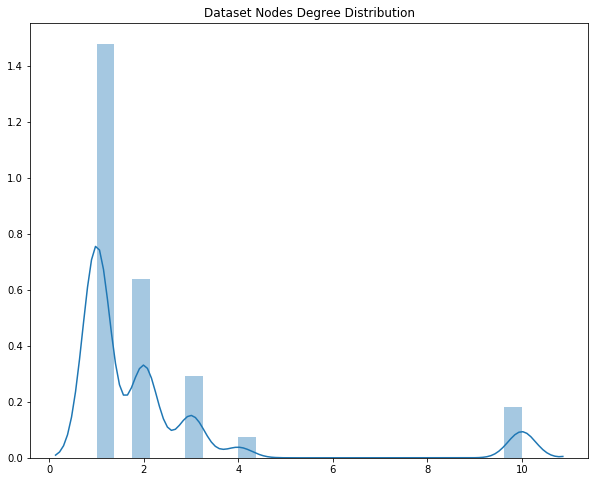

In [83]:
plt.figure(figsize=(10,8))
sns.distplot(dataset_degrees, hist = True)
plt.title('Dataset Nodes Degree Distribution')

Text(0.5,1,'Dataset Nodes Degree Distribution')

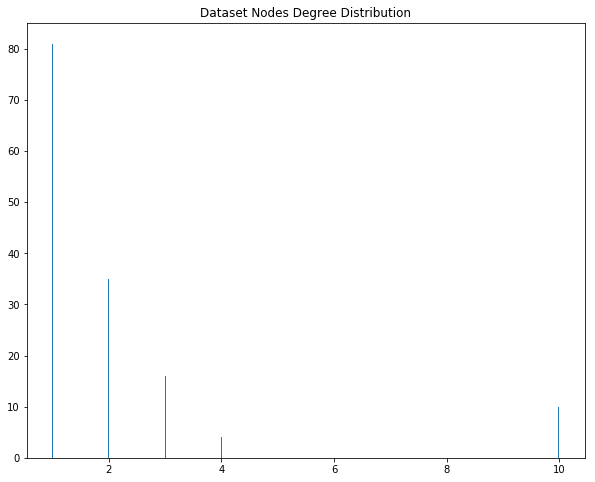

In [84]:
plt.figure(figsize=(10,8))
plt.hist(dataset_degrees, bins = 500)
plt.title('Dataset Nodes Degree Distribution')

In [85]:
sorted(dataset_degrees_dict.keys(), key = lambda x: dataset_degrees_dict[x])

['data_892',
 'data_549',
 'data_1032',
 'data_1135',
 'data_1131',
 'data_1279',
 'data_1242',
 'data_382',
 'data_954',
 'data_157',
 'data_154',
 'data_928',
 'data_557',
 'data_1206',
 'data_550',
 'data_889',
 'data_558',
 'data_544',
 'data_51',
 'data_803',
 'data_1280',
 'data_468',
 'data_165',
 'data_163',
 'data_567',
 'data_1216',
 'data_49',
 'data_990',
 'data_570',
 'data_573',
 'data_980',
 'data_981',
 'data_1060',
 'data_868',
 'data_481',
 'data_480',
 'data_861',
 'data_486',
 'data_217',
 'data_398',
 'data_1277',
 'data_1272',
 'data_1273',
 'data_1271',
 'data_464',
 'data_463',
 'data_502',
 'data_993',
 'data_741',
 'data_1173',
 'data_1177',
 'data_676',
 'data_853',
 'data_1243',
 'data_590',
 'data_1081',
 'data_1004',
 'data_1168',
 'data_1165',
 'data_339',
 'data_606',
 'data_1253',
 'data_445',
 'data_442',
 'data_204',
 'data_680',
 'data_520',
 'data_1015',
 'data_934',
 'data_2219',
 'data_831',
 'data_636',
 'data_1307',
 'data_647',
 'data_39',
 'da

In [86]:
# dataset_degrees_dict['data_324']

In [87]:
(df.data_set_id=='data_438').sum()

265

In [88]:
df.data_set_id.unique().size

521

In [89]:
G.neighbors('business:finance')

['pub_5896',
 'pub_6988',
 'pub_6600',
 'pub_6731',
 'pub_7058',
 'pub_7802',
 'pub_6981',
 'pub_7313',
 'pub_6897',
 'pub_7976',
 'pub_8069',
 'pub_7888',
 'pub_6387',
 'pub_138',
 'pub_7664',
 'pub_3161',
 'pub_121',
 'pub_6390',
 'pub_5909']

In [90]:
df_rf_visual.research_field.unique().size

13

In [91]:
df_visual.head()

,data_set_id,publication_id,score
1061,data_1135,pub_6731,0.558960
235,data_204,pub_5894,0.664305
1096,data_665,pub_6793,0.365611
905,data_558,pub_6619,0.269524
2763,data_1165,pub_8069,0.841030


In [92]:
df_rf_visual.head()

,publication_id,research_field,score_x
0,pub_121,business:finance,0.89
1,pub_130,economics:finance,0.81
2,pub_138,business:finance,0.91
3,pub_2889,economics:finance,0.88
4,pub_3161,business:finance,0.87


In [94]:
#Get research field to publications from df_rf
#then map datasets to research fields 
rf = sorted(df_rf_visual.research_field.unique())
rf_data_dict = {}
for field in rf:
    pubs = df_rf_visual[df_rf_visual.research_field == field].publication_id
    data_set = set()
    for pub in pubs:
        data = df_visual[df_visual.publication_id == pub].data_set_id
        for x in data:
            data_set.add(x)
    rf_data_dict[field] = data_set

In [95]:
[]+['data_429', 'data_545'] + ['data_1293']+['data_868', 'data_570', 'data_847', 'data_204']

['data_429',
 'data_545',
 'data_1293',
 'data_868',
 'data_570',
 'data_847',
 'data_204']

In [96]:
a = set()
a.add(('data_429',
 'data_545',
 'data_1293',
 'data_868',
 'data_570',
 'data_847',
 'data_204'))
a

{('data_429',
  'data_545',
  'data_1293',
  'data_868',
  'data_570',
  'data_847',
  'data_204')}

In [97]:
rf_data_dict_count = {}
for key in rf_data_dict.keys():
    rf_data_dict_count[key] = len(rf_data_dict[key])

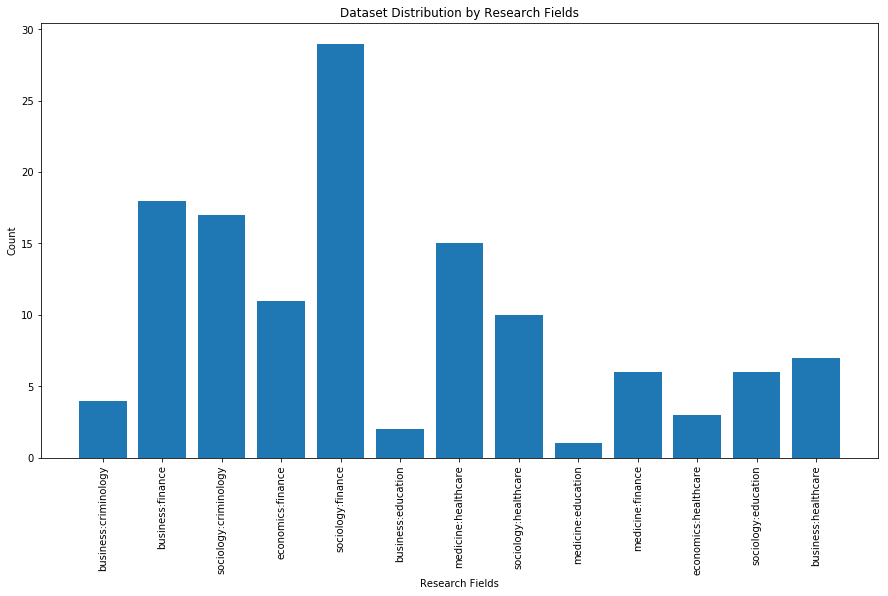

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))
plt.bar(range(len(rf_data_dict_count)), list(rf_data_dict_count.values()), align='center')
plt.xticks(range(len(rf_data_dict_count)), list(rf_data_dict_count.keys()), rotation = 90)
plt.xlabel('Research Fields')
plt.ylabel('Count')
plt.title('Dataset Distribution by Research Fields')
plt.show()

In [99]:
sum(rf_data_dict_count.values())

129

In [100]:
df.data_set_id.unique().shape

(521,)

In [101]:
randomseed = 4
pos = nx.spring_layout(G)

In [102]:
df_rf_visual.head()

,publication_id,research_field,score_x
0,pub_121,business:finance,0.89
1,pub_130,economics:finance,0.81
2,pub_138,business:finance,0.91
3,pub_2889,economics:finance,0.88
4,pub_3161,business:finance,0.87


In [103]:
dataset_nodes = df_visual.data_set_id.unique()

[pos[v] for v in dataset_nodes]

[array([ 0.88698605,  0.19452592]),
 array([ 0.61768479,  0.01917543]),
 array([ 0.41471865,  0.99069734]),
 array([ 0.10356098,  0.19692855]),
 array([ 0.51950781,  0.        ]),
 array([ 0.42004978,  0.88951463]),
 array([ 0.29008072,  0.0536529 ]),
 array([ 0.66605767,  0.97207253]),
 array([ 0.26299242,  0.94076948]),
 array([ 0.28289335,  0.94889269]),
 array([ 0.99093677,  0.59037012]),
 array([ 0.64634404,  0.02369332]),
 array([ 0.95956893,  0.68765252]),
 array([ 0.495632  ,  0.98364546]),
 array([ 0.06989661,  0.76448594]),
 array([ 0.22597471,  0.11100705]),
 array([ 0.47747995,  0.0011507 ]),
 array([ 0.98312382,  0.38404672]),
 array([ 0.03910078,  0.69450903]),
 array([ 0.02211672,  0.64518052]),
 array([ 0.61602128,  0.30561756]),
 array([ 0.78498594,  0.91377213]),
 array([ 0.00150387,  0.49100743]),
 array([ 0.16795551,  0.87645069]),
 array([ 0.84672364,  0.13716522]),
 array([ 0.03158448,  0.6774724 ]),
 array([ 0.56967077,  0.77259362]),
 array([ 0.11197242,  0.1903

In [106]:
def multiassign_x_y(d, keys, values):
    for k, v in zip(keys, values):
        d[k][0] = v 
        d[k][1] = d[k][1]*10

In [107]:
df_rf_visual

,publication_id,research_field,score_x
0,pub_121,business:finance,0.89
1,pub_130,economics:finance,0.81
2,pub_138,business:finance,0.91
3,pub_2889,economics:finance,0.88
4,pub_3161,business:finance,0.87
5,pub_5736,sociology:finance,0.87
6,pub_5747,sociology:finance,0.79
7,pub_5747,sociology:finance,0.79
8,pub_5762,economics:finance,0.92
9,pub_5894,sociology:finance,0.89


In [108]:
dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
rf_nodes_list = list(rf_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,rf_nodes_list,[0.8]*len(rf_nodes_list))



In [109]:
'pub_9140' in pub_nodes_list

False

In [110]:
pub_nodes_list

['pub_7985',
 'pub_7986',
 'pub_6859',
 'pub_7624',
 'pub_121',
 'pub_6057',
 'pub_7979',
 'pub_5993',
 'pub_6216',
 'pub_5997',
 'pub_6484',
 'pub_6643',
 'pub_7976',
 'pub_6793',
 'pub_6988',
 'pub_5736',
 'pub_6413',
 'pub_7228',
 'pub_7622',
 'pub_7458',
 'pub_6591',
 'pub_7148',
 'pub_6225',
 'pub_6497',
 'pub_7021',
 'pub_6652',
 'pub_7382',
 'pub_7147',
 'pub_7865',
 'pub_7591',
 'pub_7868',
 'pub_7596',
 'pub_5747',
 'pub_7313',
 'pub_6467',
 'pub_6709',
 'pub_7391',
 'pub_7393',
 'pub_6335',
 'pub_7396',
 'pub_6339',
 'pub_7658',
 'pub_7461',
 'pub_7171',
 'pub_7368',
 'pub_7089',
 'pub_6967',
 'pub_7362',
 'pub_6248',
 'pub_6648',
 'pub_6240',
 'pub_6174',
 'pub_7002',
 'pub_7434',
 'pub_7933',
 'pub_7840',
 'pub_7843',
 'pub_7847',
 'pub_8057',
 'pub_6931',
 'pub_3161',
 'pub_6882',
 'pub_6939',
 'pub_10267',
 'pub_8195',
 'pub_8193',
 'pub_7704',
 'pub_6012',
 'pub_7545',
 'pub_7278',
 'pub_5894',
 'pub_6928',
 'pub_5896',
 'pub_6600',
 'pub_7425',
 'pub_7424',
 'pub_7831',

In [126]:
import warnings
warnings.filterwarnings("ignore")

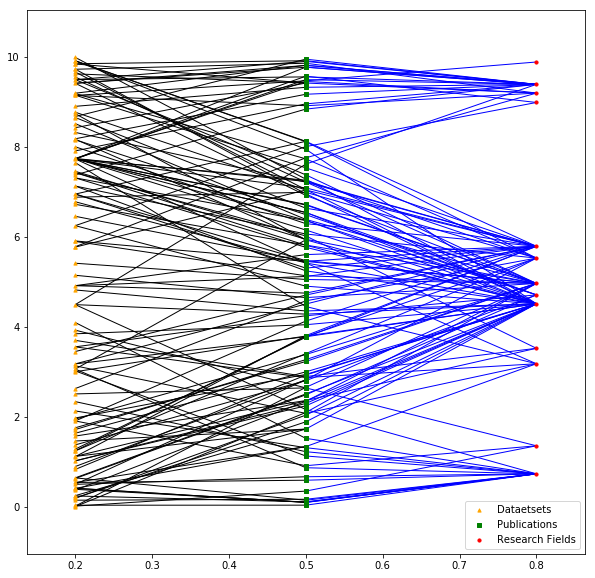

In [127]:
from matplotlib.patches import ConnectionStyle
import numpy as np
plt.figure(figsize=(10,10))

dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()